In [57]:
!pip install spacy
!pip install newsapi-python
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 KB 1.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-macosx_10_9_x86_64.whl size=154060 sha256=efba84ebbf9ac57ded7d0b9c62267966f7cc97082a46808272c4c58a76d85b7d
  Stored in directory: /Users/saran/Library/Caches/pip/wheels/f9/7a/dd/06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud


In [46]:
import spacy
import en_core_web_lg
from newsapi import NewsApiClient
import pickle
import pandas as pd
import string
import numpy as np
from collections import Counter 
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords



nltk.download('stopwords')
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/saran/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package brown to /Users/saran/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /Users/saran/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
!python -m spacy download en_core_web_lg

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-3.2.0/en_core_web_lg-3.2.0-py3-none-any.whl (777.4 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [21]:
import en_core_web_lg
from newsapi import NewsApiClient

nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient (api_key='d31df92f48574dc6ba810496816c257f')

In [28]:
temp = newsapi.get_everything(q='dogecoin', 
                              language='en', 
                              sort_by='relevancy')

In [30]:
filename = 'DogeCoin1.pckl'
pickle.dump(temp, open(filename, 'wb'))

filename = 'DogeCoin1.pckl'
loaded_model = pickle.load(open(filename, 'rb'))

filepath = 'DogeCoin1.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [31]:
print(temp)

{'status': 'ok', 'totalResults': 675, 'articles': [{'source': {'id': None, 'name': 'Boing Boing'}, 'author': 'Carla Sinclair', 'title': 'Ukraine is asking for dogecoin donations, preferring the joke coin over less valuable rubles', 'description': 'Dogecoin is now worth more than rubles, according to Ukraine\'s Vice Prime Minister Mykhailo Fedorov, who announced today that Ukraine is accepting donations of the memecoin to help fight against Russia.\n\n\n\n"Now even meme can support our army and save lives fr…', 'url': 'https://boingboing.net/2022/03/02/ukraine-is-asking-for-dogecoin-donations-preferring-the-joke-coin-over-less-valuable-rubles.html', 'urlToImage': 'https://i0.wp.com/boingboing.net/wp-content/uploads/2022/03/dogecoin.jpg?fit=1200%2C960&ssl=1', 'publishedAt': '2022-03-02T18:00:35Z', 'content': "Dogecoin is now worth more than rubles, according to Ukraine's Vice Prime Minister Mykhailo Fedorov, who announced today that Ukraine is accepting donations of the memecoin to help 

In [39]:
dados=[]

for i, article in enumerate(temp['articles']):
  title = article['title']
  description = article['description']
  content = article['content']
  date = article['publishedAt']
  dados.append({'title':title, 'date':date, 
                'desc':description, 'content':content})

In [40]:
df = pd.DataFrame(dados)
df = df.dropna()
df.head()
df.to_csv('data.csv')

In [41]:
def get_keywords_eng(text):
  result = []
  tokenized = word_tokenize(text)
  print(tokenized)

  for token in tokenized:
    if (token in nlp_eng.Defaults.stop_words or token in string.punctuation):
      continue

  return result

In [47]:
from nltk.tokenize import sent_tokenize, word_tokenize
results = []

for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

df['keywords'] = results

['Dogecoin', 'is', 'now', 'worth', 'more', 'than', 'rubles', ',', 'according', 'to', 'Ukraine', "'s", 'Vice', 'Prime', 'Minister', 'Mykhailo', 'Fedorov', ',', 'who', 'announced', 'today', 'that', 'Ukraine', 'is', 'accepting', 'donations', 'of', 'the', 'memecoin', 'to', 'help', 'fight', 'against', 'Russ…', '[', '+1979', 'chars', ']']
['Elon', 'Musk', 'advised', 'Monday', 'that', 'it', "'s", 'better', 'to', 'own', '``', 'physical', 'things', "''", 'like', 'homes', 'and', 'stocks', 'but', 'added', 'that', 'he', 'wo', "n't", 'sell', 'his', 'bitcoin', ',', 'ether', ',', 'and', 'dogecoin', 'holdings', '.', 'Musk', ',', 'CEO', 'of', 'Tesla', 'and', 'SpaceX', ',', 'and', 'th…', '[', '+1873', 'chars', ']']
['Elon', 'Musk', 'advised', 'Monday', 'that', 'it', "'s", 'better', 'to', 'own', '``', 'physical', 'things', "''", 'like', 'homes', 'and', 'stocks', 'but', 'added', 'that', 'he', 'wo', "n't", 'sell', 'his', 'bitcoin', ',', 'ether', ',', 'and', 'dogecoin', 'holdings', '.', 'Musk', ',', 'CEO', 

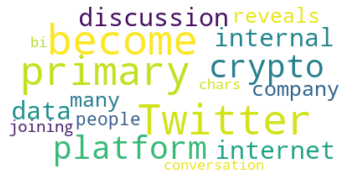

In [59]:
from wordcloud import WordCloud 

text = str(content)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()